In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## tests

In [3]:
img = mpimg.imread('car.jpg')
print('Image dimensions:', img.shape)

Image dimensions: (1000, 1000, 3)


$$
G = 0.3r + 0.59g + 0.11b
$$

In [ ]:
gray = rgb2gray(img)

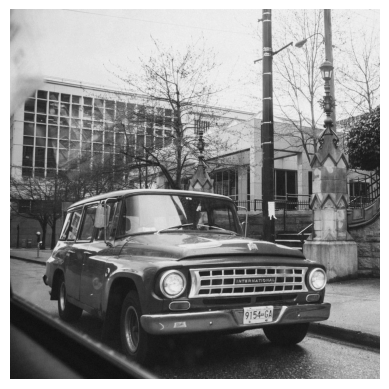

In [5]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

(-0.5, 999.5, 999.5, -0.5)

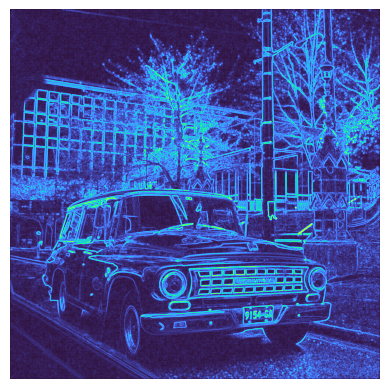

In [14]:
plt.imshow(gradG, cmap=plt.get_cmap('turbo'))
plt.axis('off')


(-0.5, 999.5, 999.5, -0.5)

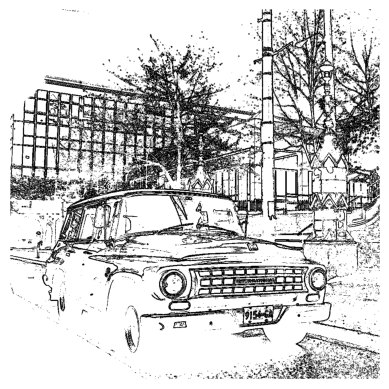

In [ ]:
mask = np.where(gradG > 15, 0, 1)
plt.imshow(mask, cmap=plt.get_cmap('gray'))
plt.axis('off')

## detect edges

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.3, 0.59, 0.11])

def nablaG(G,x,y,h=1):
    delx = (G[x+h,y]-G[x-h,y])/(2*h)
    dely = (G[x,y+h]-G[x,y-h])/(2*h)
    return (delx, dely)

def gradient(img):
    n = img.shape
    img = rgb2gray(img)
    grad = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    for x in range(1, img.shape[0]-1):
        for y in range(1, img.shape[1]-1):
            g = nablaG(img, x, y)
            grad[x, y] = np.sqrt(g[0]**2+g[1]**2)
            # grad[x, y] = abs(np.degrees(np.arctan2(g[1], g[0])))
    return grad

def hessian(img, h=1):
    n = img.shape
    img = rgb2gray(img)
    hess = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    for x in range(1, img.shape[0]-1):
        for y in range(1, img.shape[1]-1):
            hess[x, y] = img[x+h, y+h] + img[x-h, y-h] - img[x+h, y-h] - img[x-h, y+h]
    return hess[1:-1, 1:-1]

def detect_edges(file):
    img = mpimg.imread(file)
    gray = rgb2gray(img)
    gradG = gradient(gray)
    hess = hessian(gray)
    # plt.imshow(gradG, cmap=plt.get_cmap('turbo'))
    return gradG, hess

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.3, 0.59, 0.11])

def nablaG(G,x,y,h=1):
    if h == 1:
        delx = (G[x+1,y]-G[x-1,y])/2
        dely = (G[x,y+1]-G[x,y-1])/2
    elif h == 2:
        delx = (2*G[x+1,y]+G[x+2,y]-2*G[x-1,y]-G[x-2,y])/8
        dely = (2*G[x,y+1]+G[x,y+2]-2*G[x,y-1]-G[x,y-2])/8
    else: 
        return (0, 0)
    return (delx, dely)

def gradient(img, h=1, file=True):
    if file:
        img = mpimg.imread(img)
        img = rgb2gray(img)
    n = img.shape
    grad = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    for x in range(h, img.shape[0]-h):
        for y in range(h, img.shape[1]-h):
            g = nablaG(img, x, y, h=h)
            grad[x, y] = np.sqrt(g[0]**2+g[1]**2)
    return grad

def laplacian(img, h=1, file=True):
    if file:
        img = mpimg.imread(img)
        img = rgb2gray(img)
    n = img.shape
    lap = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    for x in range(h, img.shape[0]-h):
        for y in range(h, img.shape[1]-h):
            # g = nablaG(img, x, y, h=h)
            lap[x, y] = (img[x,y+1]+img[x,y-1]+img[x+1,y]+img[x-1,y]-4*img[x,y])/h**2
    return lap

def hessian(img):
    grad = gradient(img)
    img = mpimg.imread(img)
    n = img.shape
    img = rgb2gray(img)
    # hess = np.empty(((n,n) + (2,2)))
    # x_grad = np.gradient(x) 
    hessian = np.empty((img.ndim, img.ndim) + img.shape, dtype=img.dtype) 
    for k, grad_k in enumerate(grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        print
        tmp_grad = gradient(grad_k, file=False) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian

def smoothen(img, file=True):
    if file:
        img = mpimg.imread(img)
        img = rgb2gray(img)
    n = img.shape
    smooth = img.copy()
    for x in range(1, n[0]-1):
        for y in range(n[1]-1):
            smooth[x,y] = (img[x,y]+img[x-1,y]+img[x+1,y]+\
                           img[x,y-1]+img[x-1,y-1]+img[x+1,y-1]+\
                           img[x,y+1]+img[x-1,y+1]+img[x+1,y+1])/9
    return smooth

def DOH(img):
    hess = hessian(img)
    print(hess)
    img = mpimg.imread(img)
    n = img.shape
    img = rgb2gray(img)
    doh = np.zeros((n,n))
    for x in range(n):
        for y in range(n):
            doh[x,y] = np.linalg.det(hess[x,y])
    return np.linalg.det()

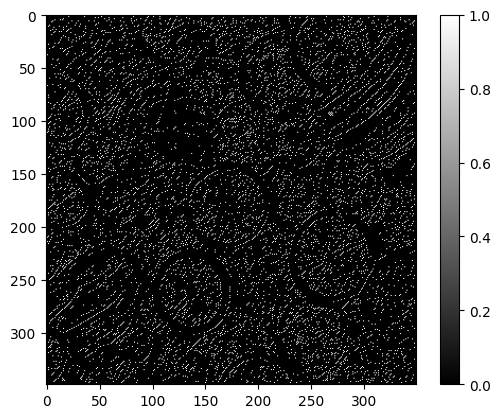

In [ ]:
def hessian(x):
    x=mpimg.imread(x)
    x=rgb2gray(x)
    x_grad = np.gradient(x) 
    hessian = np.empty((x.ndim, x.ndim) + x.shape, dtype=x.dtype) 
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        tmp_grad = np.gradient(grad_k) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    hessian = np.swapaxes(hessian, 0, 2)
    hessian = np.swapaxes(hessian, 1, 3)
    return hessian

def DOH(hess):
    n = hess.shape[0]
    doh = np.zeros((n,n))
    for x in range(n):
        for y in range(n):
            det = np.linalg.det(hess[x,y])
            doh[x,y] = det
            # if det>0:
            #     doh[x,y] = 1
            # elif det<0:
            #     doh[x,y] = -1
    return doh

def zero_crossings(im):
    for x, y in img

# a = laplacian('data/fruits.jpg')
a = laplacian(smoothen('data/fruits.jpg'), file=False)
# b = np.p(a, np.identity(a.shape[0]))
# d = DOH(a)
fig = plt.figure()
# zero_crossings = np.where(np.diff(np.sign(a), axis=1) == 2, 1, 0)
zero_crossings = np.where((np.diff(np.sign(a), axis=1)[:-1,:] == 2) & ((np.diff(np.sign(a), axis=0))[:,:-1] == 2), 1, 0)
# im = plt.imshow(d[1:-1,1:-1], cmap='gray')
# im = plt.imshow(a, cmap='gray')
im = plt.imshow(zero_crossings, cmap='gray')
# im = plt.imshow(np.diff(np.sign(a), axis=0), cmap='gray')
fig.colorbar(im)
# zero_crossings[0]

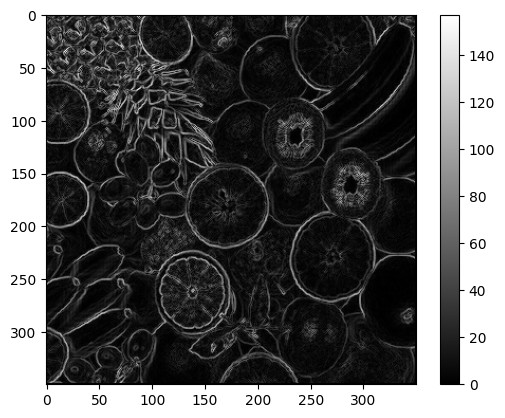

In [96]:
fig = plt.figure()
im = plt.imshow(gradient('data/fruits.jpg'), cmap='gray')
fig.colorbar(im)

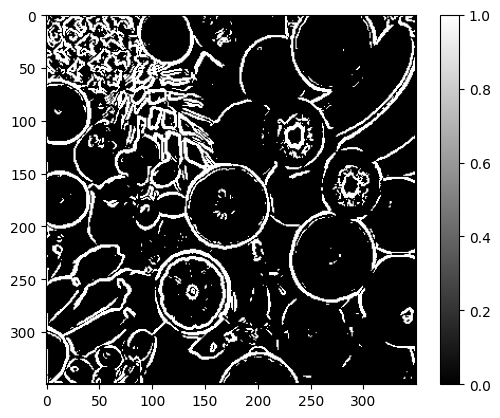

In [109]:
fig = plt.figure()
xx = gradient(smoothen('data/fruits.jpg'), h=1, file=False)
mk = np.where(xx > 20, 1, 0)
im = plt.imshow(mk, cmap='gray')
fig.colorbar(im)

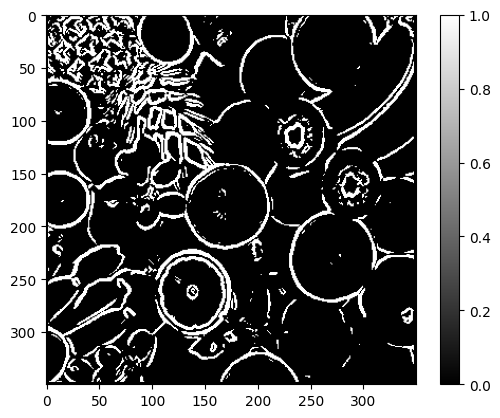

In [108]:
fig = plt.figure()
xx = gradient(smoothen('data/fruits.jpg'), h=2, file=False)
mk = np.where(xx > 20, 1, 0)
im = plt.imshow(mk, cmap='gray')
fig.colorbar(im)

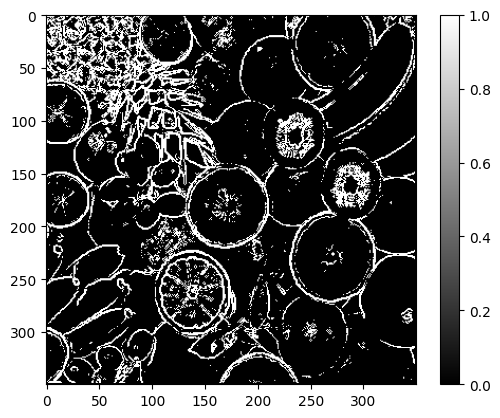

In [105]:
fig = plt.figure()
xx = gradient('data/fruits.jpg', h=1)
mk = np.where(xx > 30, 1, 0)
im = plt.imshow(mk, cmap='gray')
fig.colorbar(im)

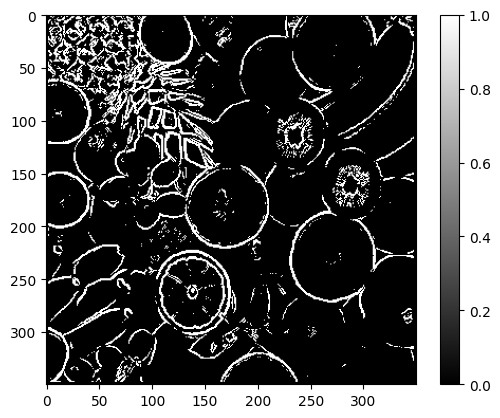

In [104]:
fig = plt.figure()
xx = gradient('data/fruits.jpg', h=2)
mk = np.where(xx > 30, 1, 0)
im = plt.imshow(mk, cmap='gray')
fig.colorbar(im)

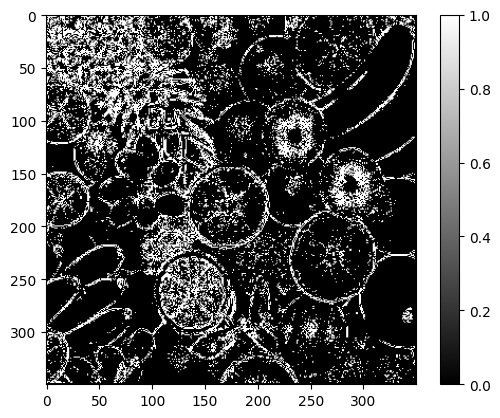

In [145]:
fig = plt.figure()
xx = laplacian('data/fruits.jpg', h=1)
# sm = smoothen('data/fruits.jpg')
# xx = laplacian(sm, file=False)
mk = np.where(np.abs(xx) < 60, 0, 1)
im = plt.imshow(mk, cmap='gray')
# im = plt.imshow(np.abs(xx), cmap='gray')
fig.colorbar(im)

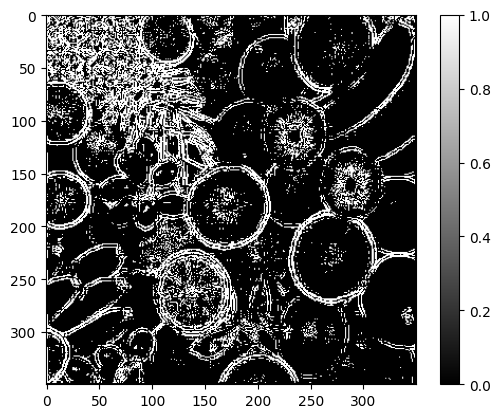

In [149]:
fig = plt.figure()
# xx = laplacian('data/fruits.jpg', h=1)
sm = smoothen('data/fruits.jpg')
xx = laplacian(sm, file=False)
mk = np.where(np.abs(xx) < 15, 0, 1)
im = plt.imshow(mk, cmap='gray')
# im = plt.imshow(np.abs(xx), cmap='gray')
fig.colorbar(im)

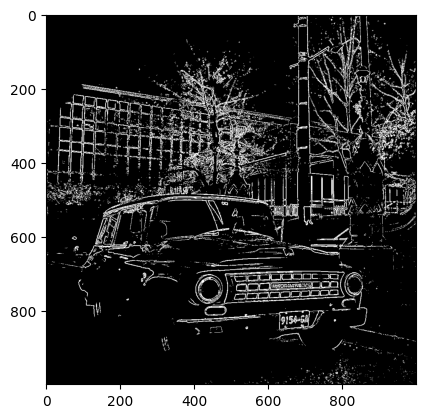

In [10]:
mask1 = np.where(grad1 > 30, 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))

(-0.5, 748.5, 1059.5, -0.5)

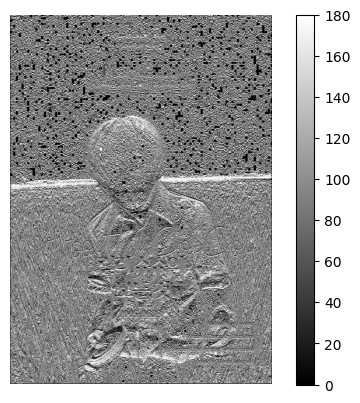

In [78]:
grad2 = detect_edges('lily.jpg')
plt.colorbar()
plt.axis('off')

(-0.5, 748.5, 1059.5, -0.5)

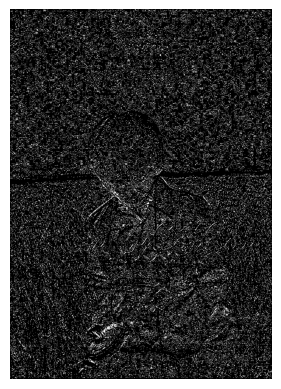

In [79]:
t = 15
mask1 = np.where((grad2 > 45-t) & (grad2 < 45+t), 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

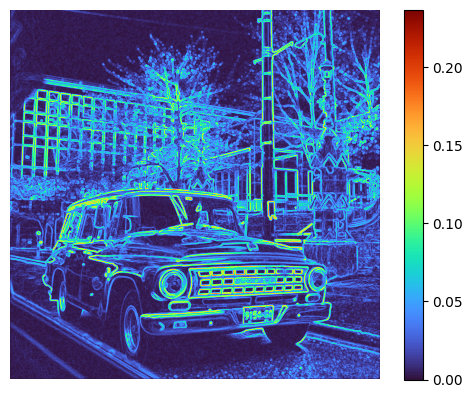

In [12]:
grad2 = detect_edges('cara.png')
plt.colorbar()
plt.axis('off')

In [101]:
np.max(grad2)/4

0.05919951951364513

(0.05919951951364513, 0.0)

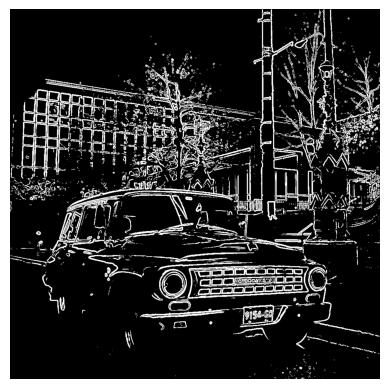

In [22]:
# t = 15
# mask1 = np.where((grad2 > 45-t) & (grad2 < 45+t), 1, 0)
mask1 = np.where(grad2 > 0.06, 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))
plt.axis('off')
np.max(grad2)/4, np.min(grad2)

In [ ]:
def show_edges(file, k=0.25, size=(12, 8)): 
    gradient_matrix, hess = detect_edges(file)
    edge_us = np.where(gradient_matrix > np.max(gradient_matrix)*k, 1, 0)
    img = cv.imread(file, cv.IMREAD_GRAYSCALE)
    edges = cv.Canny(img,100,200)

    plt.figure(figsize=size)    
    plt.subplot(231),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(gradient_matrix,cmap = 'gray')
    plt.title('Gradient Matrix'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(edge_us,cmap = 'gray')
    plt.title('Our Edge Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(234),plt.imshow(hess,cmap = 'gray')
    plt.title('Hessian Matrix'), plt.xticks([]), plt.yticks([])
    plt.subplot(236),plt.imshow(edges,cmap = 'gray')
    plt.title('OpenCV Edge\nDetection'), plt.xticks([]), plt.yticks([])
    
    plt.show()

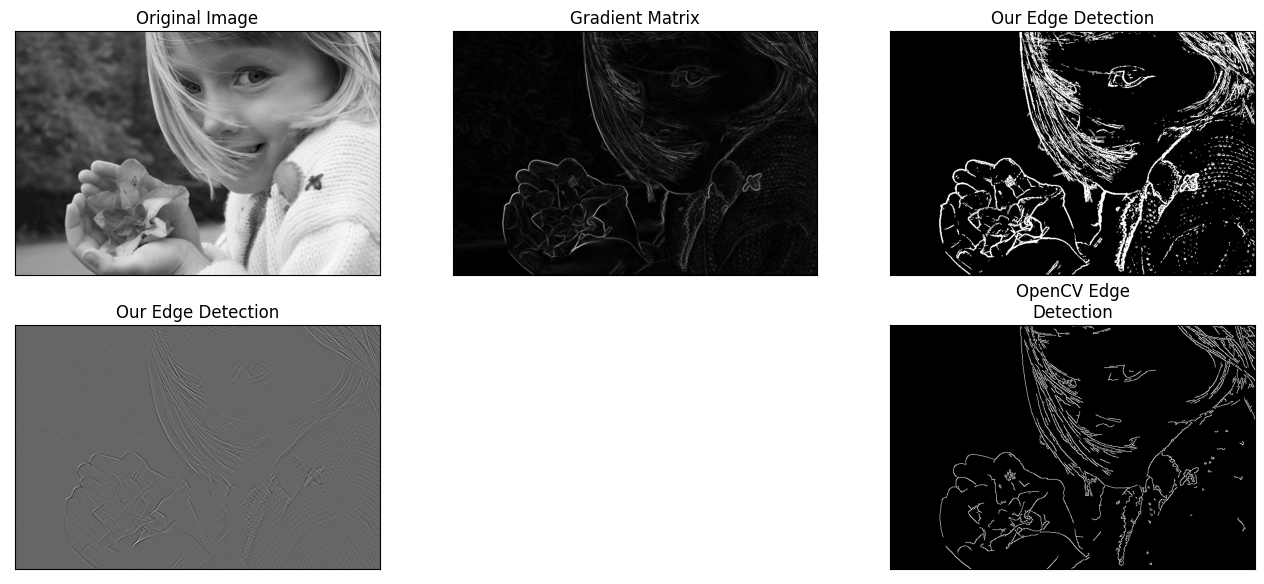

In [48]:
show_edges('kid.png', k=0.1, size=(16,7))

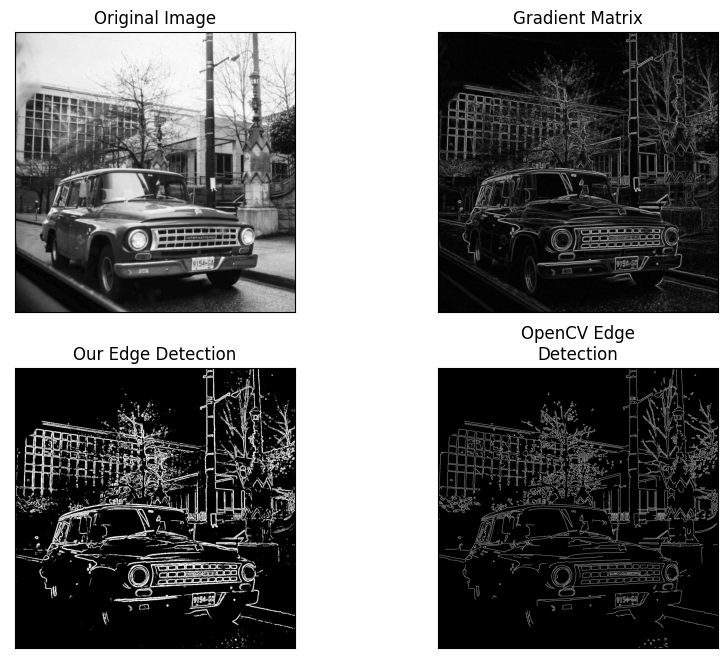

In [37]:
show_edges('cara.png', k=0.25, size=(10,8))

In [ ]:
def hessian(img):
    

In [ ]:
import numpy as np
#Gradient Function
def gradient_f(x, f):
  assert (x.shape[0] >= x.shape[1]), "the vector should be a column vector"
  x = x.astype(float)
  N = x.shape[0]
  gradient = []
  for i in range(N):
    eps = abs(x[i]) *  np.finfo(np.float32).eps 
    xx0 = 1. * x[i]
    f0 = f(x)
    x[i] = x[i] + eps
    f1 = f(x)
    gradient.append(np.asscalar(np.array([f1 - f0]))/eps)
    x[i] = xx0
  return np.array(gradient).reshape(x.shape)

#Hessian Matrix
def hessian (x, the_func):
  N = x.shape[0]
  hessian = np.zeros((N,N)) 
  gd_0 = gradient_f( x, the_func)
  eps = np.linalg.norm(gd_0) * np.finfo(np.float32).eps 
  for i in range(N):
    xx0 = 1.*x[i]
    x[i] = xx0 + eps
    gd_1 =  gradient_f(x, the_func)
    hessian[:,i] = ((gd_1 - gd_0)/eps).reshape(x.shape[0])
    x[i] =xx0
  return hessian

plt.imshow(hessian(gray, ), cmap=plt.get_cmap('gray'))

C:\Users\user\AppData\Local\Temp\ipykernel_9540\3806197727.py:10: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  h_matrix = hessian_matrix(image, sigma=2.0)


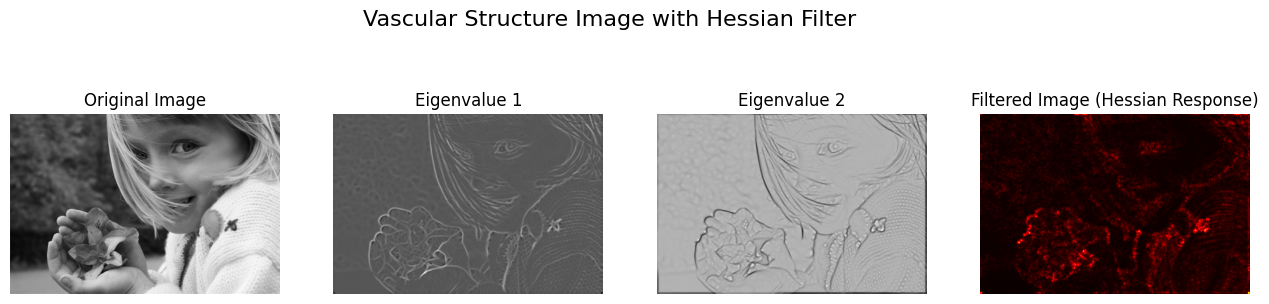

In [67]:
from skimage import io, color
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage.filters import gaussian

# Load the provided image
image_path = 'kid.png'
image = io.imread(image_path, as_gray=True)  

# Compute the Hessian matrix
h_matrix = hessian_matrix(image, sigma=2.0)

# Compute the eigenvalues of the Hessian matrix
eigvals = hessian_matrix_eigvals(h_matrix)

# Calculate the Hessian response using the minimum of the absolute eigenvalues
hessian_response = np.minimum(np.abs(eigvals[0]), np.abs(eigvals[1]))

# Apply Gaussian smoothing to the Hessian response for a cleaner visualization
filtered_image = gaussian(hessian_response, sigma=1)

# Display the original image, eigenvalues, and filtered response
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Eigenvalue 1
axes[1].imshow(eigvals[0], cmap='gray')
axes[1].set_title("Eigenvalue 1")
axes[1].axis('off')

# Eigenvalue 2
axes[2].imshow(eigvals[1], cmap='gray')
axes[2].set_title("Eigenvalue 2")
axes[2].axis('off')

# Filtered Hessian Response
axes[3].imshow(filtered_image, cmap='hot')
axes[3].set_title("Filtered Image (Hessian Response)")
axes[3].axis('off')

plt.suptitle("Vascular Structure Image with Hessian Filter", fontsize=16)
plt.show()